In [27]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [28]:
# Read dataset
processed_data = os.path.abspath('../datasets/processed_data.csv')

# Merging two csv files
data = pd.read_csv(processed_data)

data.head()

,Location,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,0,26,18,48,24.0,47.0,17.0,210.0,13.0,14.0,a_Good
1,7,22,20,36,18.0,28.0,8.0,346.0,27.0,7.0,a_Good
2,0,28,18,37,19.0,37.0,18.0,272.0,11.0,21.0,a_Good
3,0,28,18,37,19.0,37.0,18.0,272.0,11.0,21.0,a_Good
4,0,27,18,47,24.0,46.0,19.0,216.0,8.0,14.0,a_Good


In [29]:
# Перетворення категоріальних змінних
label_encoder = LabelEncoder()
data['AQI_Class'] = label_encoder.fit_transform(data['AQI_Class'])

# Вибір фіч і цільової змінної
X = data[['Location', 'Day', 'Hour', 'PM2.5', 'PM10', 'O3', 'CO', 'SO2', 'NO2']]
y = data['AQI_Class']

# Масштабування даних
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Перетворення цільової змінної в one-hot encoding
y = to_categorical(y)

# Розділення на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Building an MLP model
model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y.shape[1], activation='softmax')
])

print(model.summary())

/Users/macbook/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 256)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,102 (172.27 KB)

 Trainable params: 44,102 (172.27 KB)

 Non-trainable params: 0 (0.00 B)

None


In [31]:
# Model compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
# Навчання моделі
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5200 - loss: 1.1998 - val_accuracy: 0.8056 - val_loss: 0.5651
Epoch 2/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7936 - loss: 0.5814 - val_accuracy: 0.8999 - val_loss: 0.3851
Epoch 3/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8609 - loss: 0.4420 - val_accuracy: 0.9681 - val_loss: 0.2967
Epoch 4/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9026 - loss: 0.3582 - val_accuracy: 0.9632 - val_loss: 0.2383
Epoch 5/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9193 - loss: 0.3278 - val_accuracy: 0.9681 - val_loss: 0.2141
Epoch 6/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9398 - loss: 0.2693 - val_accuracy: 0.9681 - val_loss: 0.1951
Epoch 7/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9416 - loss: 0.2571 - val_accuracy: 0.9681 - val_loss: 0.1910
Epoch 8/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9484 - loss: 0.2373 - val_accuracy: 0.

In [33]:
# Оцінка моделі
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 97.30%


In [34]:
# Прогнозування
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step


In [35]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred, target_names=list(label_encoder.classes_)))

Classification Report:
                                  precision    recall  f1-score   support

                          a_Good       0.98      0.97      0.98       314
                      b_Moderate       0.99      0.97      0.98       321
c_Unhealthy_for_Sensitive_Groups       0.97      0.98      0.98       585
                     d_Unhealthy       0.97      0.97      0.97       521
                e_Very_Unhealthy       0.98      0.97      0.98       444
                        f_Severe       0.96      0.96      0.96       263

                        accuracy                           0.97      2448
                       macro avg       0.97      0.97      0.97      2448
                    weighted avg       0.97      0.97      0.97      2448



In [36]:
# F1 Score
f1 = f1_score(y_test_classes, y_pred, average='weighted')
print(f"F1 Score (weighted): {f1:.2f}")

F1 Score (weighted): 0.97


Confusion Matrix


<Axes: >

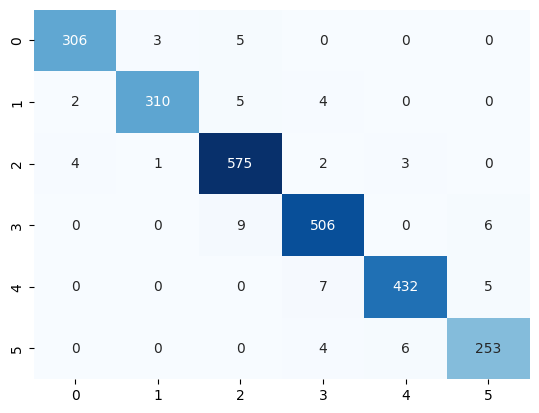

In [37]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred)
print("Confusion Matrix")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

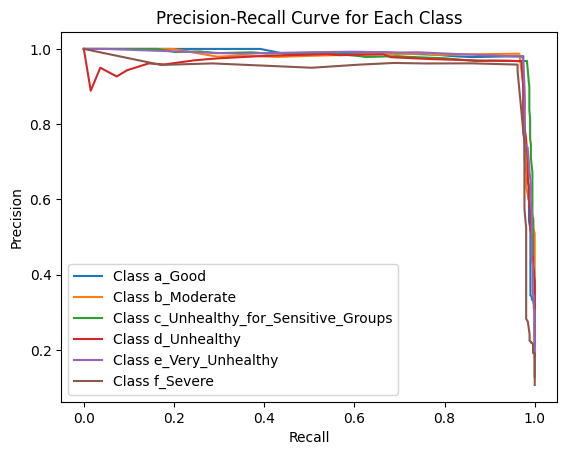

In [38]:
# Precision-Recall Curve for each class
plt.figure()
for i, class_name in enumerate(label_encoder.classes_):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred_probs[:, i])
    plt.plot(recall, precision, label=f'Class {class_name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend()
plt.show()

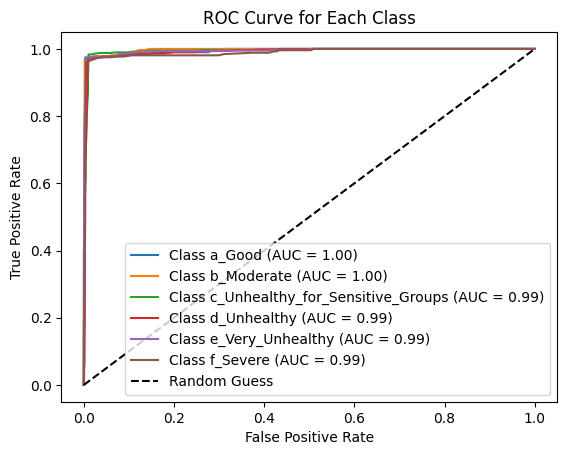

In [39]:
# ROC Curve and AUC for each class
plt.figure()
for i, class_name in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend()
plt.show()

In [40]:
# Saving the model
model.save("serialized/keras/mlpModel.keras")